# Maram Motaz Youssef 
## Data Science & Business Analytics Internship task 
## Task #6 Prediction Using Decision Tree 

In [1]:
# importing needed libraries
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Reading Data

In [2]:
dataframe=pd.read_csv("Iris.csv", index_col= 0)
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Information and details about the data (No null values found)

In [3]:
dataframe.info()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing SepalLength vs SepalWidth

Text(0.5, 1.0, 'Plotting SepalLength vs SepalWidth')

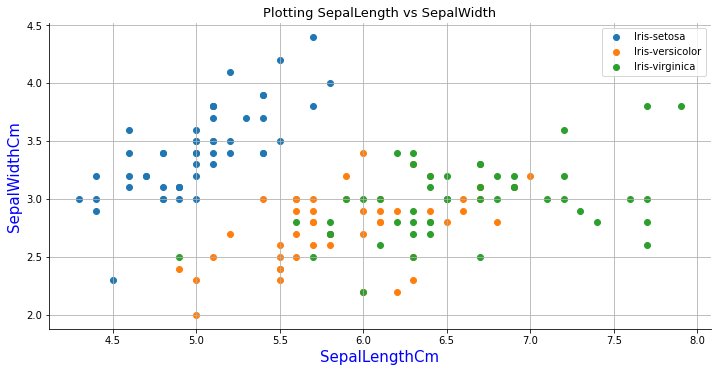

In [4]:
sns.FacetGrid(dataframe, hue="Species", aspect=2,height=5).map(plt.scatter, "SepalLengthCm" , "SepalWidthCm")
plt.legend()
plt.grid()
plt.xlabel("SepalLengthCm", color="blue" ,size=15)
plt.ylabel("SepalWidthCm" , color="blue" ,size=15)
plt.title("Plotting SepalLength vs SepalWidth", size=13)


## Representation of the correlation with heat map

<AxesSubplot:>

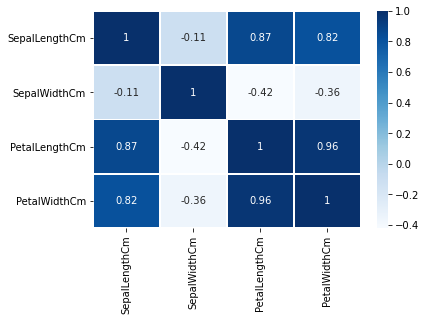

In [5]:
sns.heatmap(data= dataframe.corr(), annot=True, linewidths=.6, cmap="Blues")

## Preparing features and target 

In [15]:
X= dataframe.drop(columns=['Species'])
Y= dataframe['Species']
print(X[:5])
Y.head()

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1             5.1           3.5            1.4           0.2
2             4.9           3.0            1.4           0.2
3             4.7           3.2            1.3           0.2
4             4.6           3.1            1.5           0.2
5             5.0           3.6            1.4           0.2


Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

## Splitting data into test & train

In [7]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2, random_state=2,shuffle =True)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


## Hyperparameters tuning using GridSearchCV function with 10 folds 

In [8]:
parameters={"criterion":['gini','entropy'], "max_depth": range(1,10), "min_samples_split": range(2,10)}
Decision_Tree=GridSearchCV(DecisionTreeClassifier(),parameters,cv=10,verbose=1)
Decision_Tree.fit(x_train,y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [9]:
Decision_Tree.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [10]:
Decision_Tree.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [11]:
Decision_Tree.best_score_

0.975

In [12]:
Decision_Tree.score(x_test, y_test)


0.9666666666666667

## Classification report to show accuracy,  precision, recall,  f1-score,  and support


In [13]:
print (classification_report(y_test,Decision_Tree.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Visualizing the tree

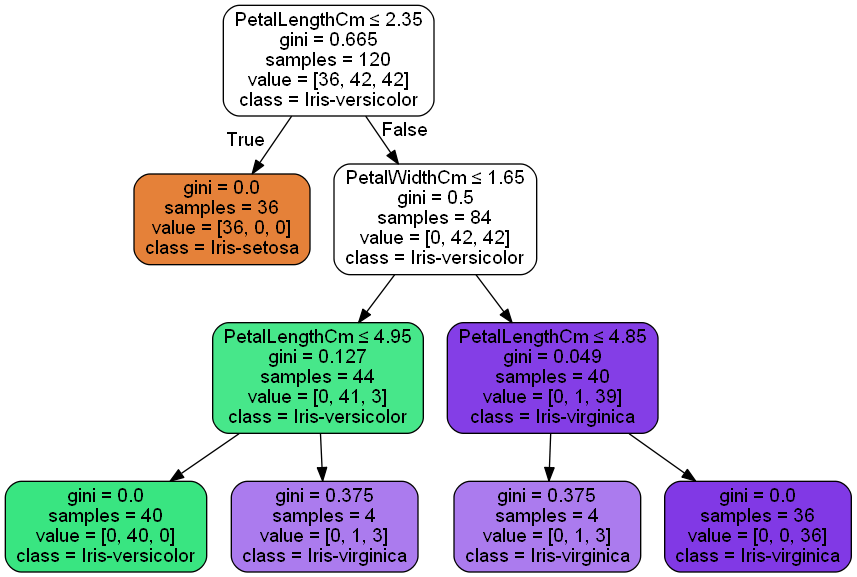

In [14]:
dot_data = StringIO()
export_graphviz(Decision_Tree.best_estimator_, out_file=dot_data, feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"] ,filled=True, rounded=True,special_characters=True)
Tree_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(Tree_graph.create_png())